<a href="https://colab.research.google.com/github/Laila4563/Machine-Learning-Project/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
file_path = "/content/drive/Shareddrives/ML Project/train.csv"
df = pd.read_csv(file_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print unique values
for col, values in unique_values.items():
    print(f"{col}: {values}\n")


Id: [   1    2    3 ... 1458 1459 1460]

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea: [ 8450  9600 11250 ... 17217 13175  9717]

Street: ['Pave' 'Grvl']

Alley: [nan 'Grvl' 'Pave']

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities: ['AllPub' 'NoSeWa']

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR

In [ ]:
pd.set_option('display.max_rows', None)  #this line to show all of the records
df_dtypes = pd.DataFrame({"Feature": df.columns, "Data Type": df.dtypes})
print(df_dtypes)
pd.reset_option('display.max_rows')


                     Feature Data Type
Id                        Id     int64
MSSubClass        MSSubClass     int64
MSZoning            MSZoning    object
LotFrontage      LotFrontage   float64
LotArea              LotArea     int64
Street                Street    object
Alley                  Alley    object
LotShape            LotShape    object
LandContour      LandContour    object
Utilities          Utilities    object
LotConfig          LotConfig    object
LandSlope          LandSlope    object
Neighborhood    Neighborhood    object
Condition1        Condition1    object
Condition2        Condition2    object
BldgType            BldgType    object
HouseStyle        HouseStyle    object
OverallQual      OverallQual     int64
OverallCond      OverallCond     int64
YearBuilt          YearBuilt     int64
YearRemodAdd    YearRemodAdd     int64
RoofStyle          RoofStyle    object
RoofMatl            RoofMatl    object
Exterior1st      Exterior1st    object
Exterior2nd      Exterior

In [ ]:
#Checking the percentage of the missing data
pd.set_option('display.max_rows', None)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns, 'Missing Percentage': missing_percentage})
print(missing_df)


                     Feature  Missing Percentage
Id                        Id            0.000000
MSSubClass        MSSubClass            0.000000
MSZoning            MSZoning            0.000000
LotFrontage      LotFrontage           17.739726
LotArea              LotArea            0.000000
Street                Street            0.000000
Alley                  Alley           93.767123
LotShape            LotShape            0.000000
LandContour      LandContour            0.000000
Utilities          Utilities            0.000000
LotConfig          LotConfig            0.000000
LandSlope          LandSlope            0.000000
Neighborhood    Neighborhood            0.000000
Condition1        Condition1            0.000000
Condition2        Condition2            0.000000
BldgType            BldgType            0.000000
HouseStyle        HouseStyle            0.000000
OverallQual      OverallQual            0.000000
OverallCond      OverallCond            0.000000
YearBuilt          Y

In [ ]:
#Checking the features values with missing values
features = ["LotFrontage", "Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]
pd.set_option('display.max_rows', None)
for feature in features:
    unique_values = df[feature].dropna().unique()  # Drop NaN values to see actual unique values
    print(f"{feature}: {unique_values}")

for feature in features:
    print(f"Feature: {feature}")
    print(df[feature].value_counts(dropna=False))  # Includes NaN in count
    print("\n" + "-"*50 + "\n")


LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  72.  66. 101.
  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52. 100.
  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley: ['Grvl' 'Pave']
MasVnrType: ['BrkFace' 'Stone' 'BrkCmn']
FireplaceQu: ['TA' 'Gd' 'Fa' 'Ex' 'Po']
PoolQC: ['Ex' 'Fa' 'Gd']
Fence: ['MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature: ['Shed' 'Gar2' 'Othr' 'TenC']
MasVnrType: ['BrkFace' 'Stone' 'BrkCmn']
BsmtQual: ['Gd' 'TA' 'Ex' 'Fa']
BsmtCond: ['TA' 'Gd' 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
BsmtFinType2: ['Unf' 'BL

In [ ]:
#Grouping the related features to handle data logically
def fix_logically_missing_values(df):
    df = df.copy()  # Avoid modifying the original data

    feature_groups = {
        "Garage": {
            "primary": "GarageType",
            "related_categorical": ["GarageFinish", "GarageQual", "GarageCond"],
            "related_numerical": ["GarageYrBlt", "GarageCars", "GarageArea"]
        },
        "Basement": {
            "primary": "BsmtQual",
            "related_categorical": ["BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"],
            "related_numerical": ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
        },
        "Masonry": {
            "primary": "MasVnrType",
            "related_categorical": [],
            "related_numerical": ["MasVnrArea"]
        }
    }

    for key, features in feature_groups.items():
        primary_col = features["primary"]
        categorical_cols = features["related_categorical"]
        numerical_cols = features["related_numerical"]

        # If the primary feature is missing (indicating absence of the structure), handle its related features
        missing_mask = df[primary_col].isna()

        for col in categorical_cols:
            df.loc[missing_mask, col] = "Not Available"

        for col in numerical_cols:
            df.loc[missing_mask, col] = 0

    return df


In [ ]:
def clean_missing_values(df):
    df = df.copy()

    # Handle categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        df.loc[:, col] = df[col].replace(["None", "NA", np.nan], "Not Available")

    # Handle numerical columns
    for col in df.select_dtypes(include=['number']).columns:
        missing_percentage = df[col].isna().mean() * 100  #missing values' percentages

        if missing_percentage > 50:
            print(f"Dropping column '{col}' due to {missing_percentage:.2f}% missing values.")
            df.drop(columns=[col], inplace=True)
        elif missing_percentage > 0:
            median_value = df[col].median()
            print(f"Filling missing values in '{col}' with median: {median_value}")
            df.loc[:, col] = df[col].fillna(median_value)

    return df

In [ ]:
fix_df = fix_logically_missing_values(df)

In [ ]:
cleaned_df=clean_missing_values(fix_df)
cleaned_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Not Available,IR1,Lvl,AllPub,...,0,Not Available,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Not Available,Reg,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,Not Available,IR1,Lvl,AllPub,...,0,Not Available,Not Available,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Not Available,Reg,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Not Available,Reg,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,1,2008,WD,Normal,118000


In [ ]:
def check_all_unique_values(df):
    unique_info = {}

    for col in df.columns:
        unique_info[col] = df[col].dropna().unique()  # Drop NaN for better readability

    return unique_info

unique_values_dict = check_all_unique_values(cleaned_df)

# Print unique values for each feature
for feature, values in unique_values_dict.items():
    print(f"Feature: {feature}")
    print(f"Unique Values ({len(values)}): {values}\n")
    print("-" * 50)



Feature: Id
Unique Values (1460): [   1    2    3 ... 1458 1459 1460]

--------------------------------------------------
Feature: MSSubClass
Unique Values (15): [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

--------------------------------------------------
Feature: MSZoning
Unique Values (5): ['RL' 'RM' 'C (all)' 'FV' 'RH']

--------------------------------------------------
Feature: LotFrontage
Unique Values (110): [ 65.  80.  68.  60.  84.  85.  75.  69.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

-

In [ ]:
cleaned_df.duplicated().sum()

0

In [ ]:
cleaned_df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
Utilities,0


In [ ]:
#Saving the new data in a new file
save_path = "/content/drive/Shareddrives/ML Project/preprocessed_data.csv"

cleaned_df.to_csv(save_path, index=False)

print(f"Preprocessed data saved at: {save_path}")

Preprocessed data saved at: /content/drive/My Drive/preprocessed_data.csv


Handling Outliers


In [5]:
file_path = "/content/drive/Shareddrives/ML Project/preprocessed_data.csv"
df = pd.read_csv(file_path)

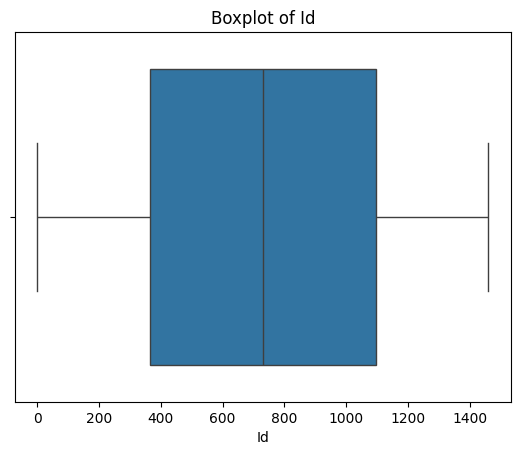

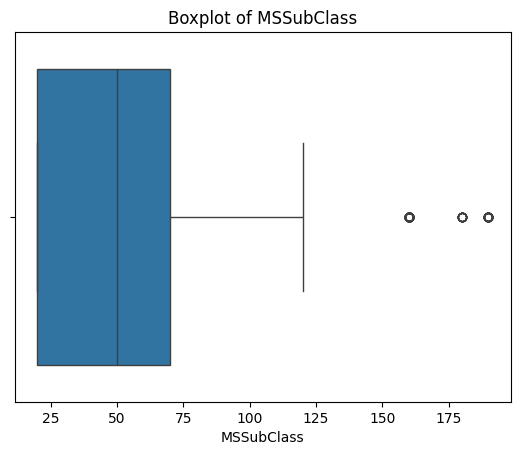

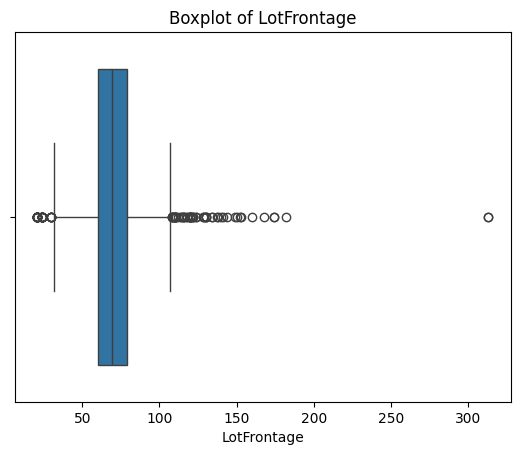

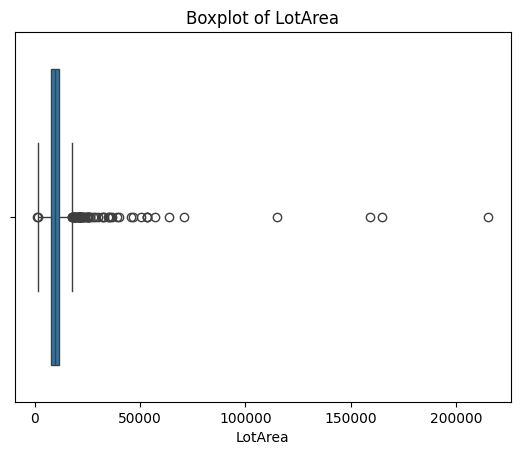

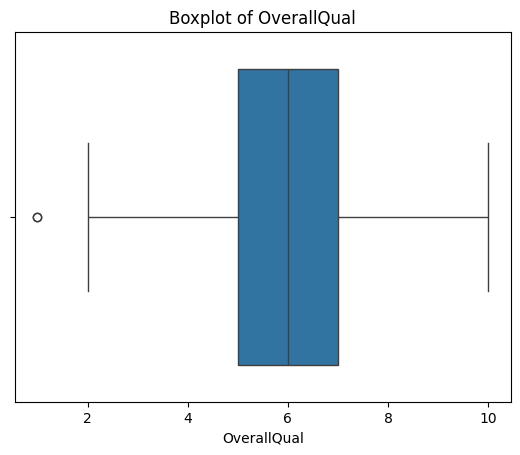

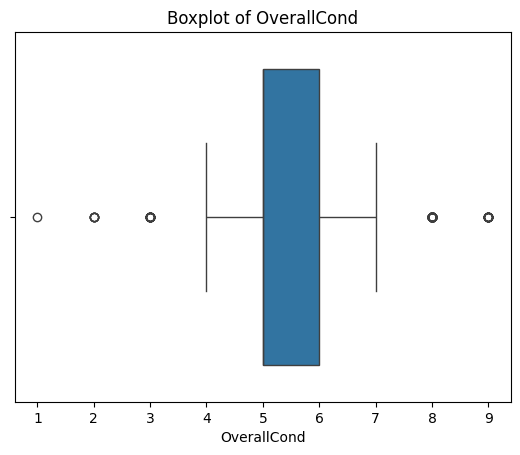

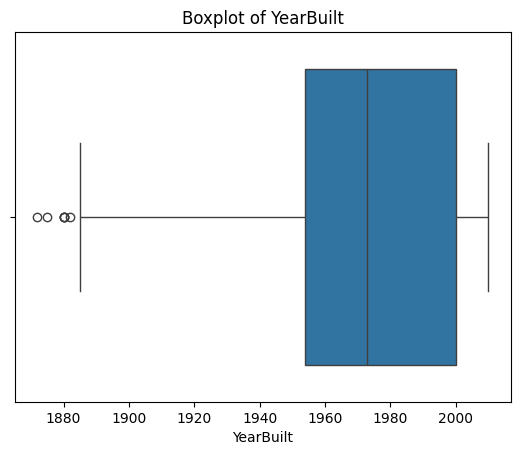

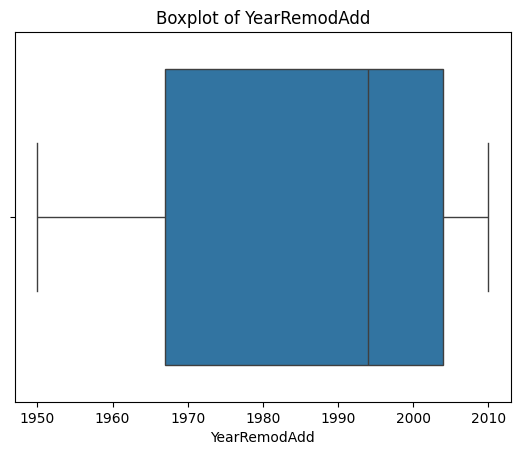

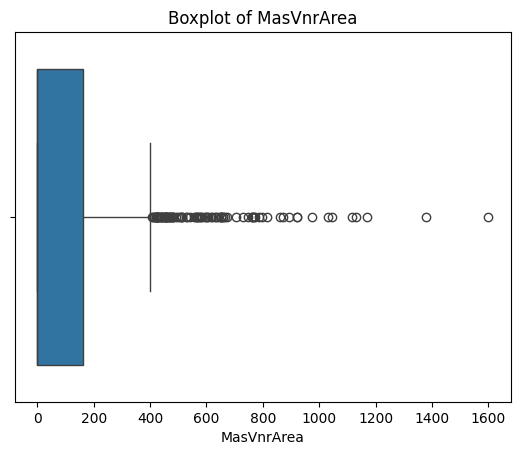

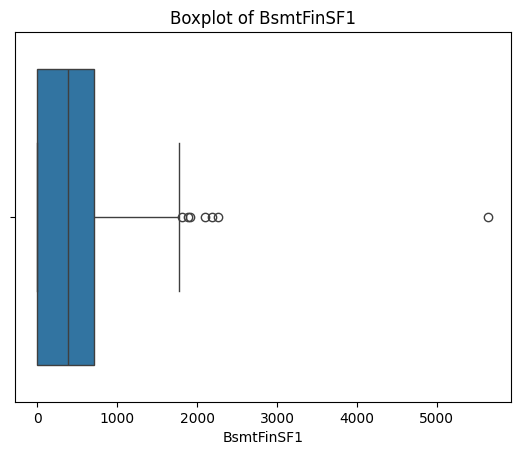

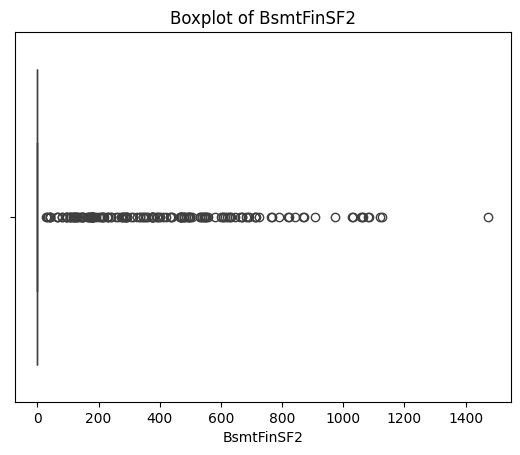

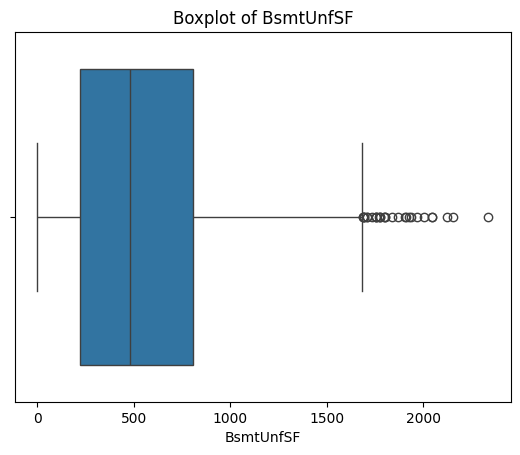

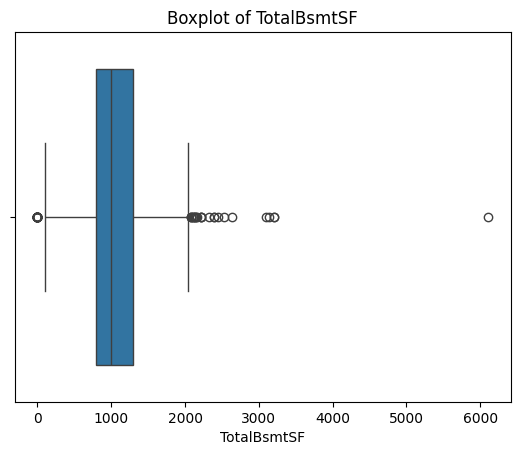

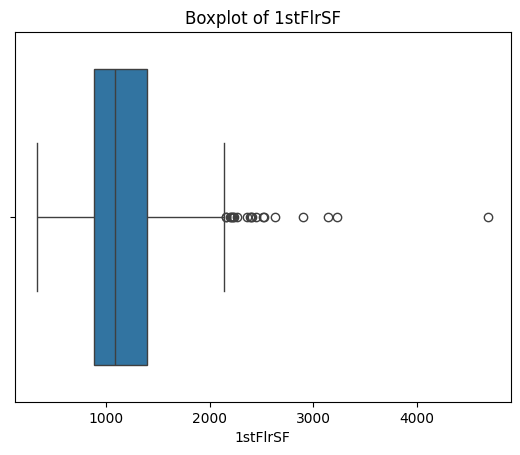

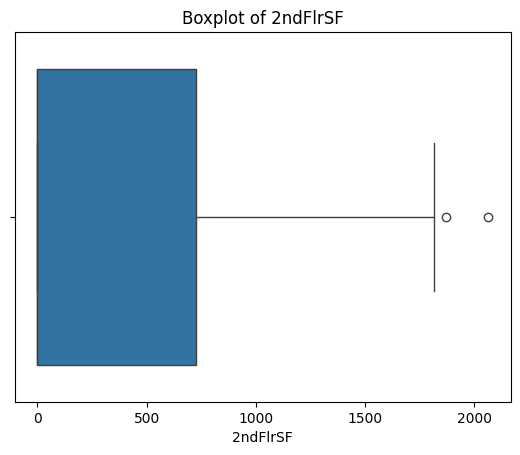

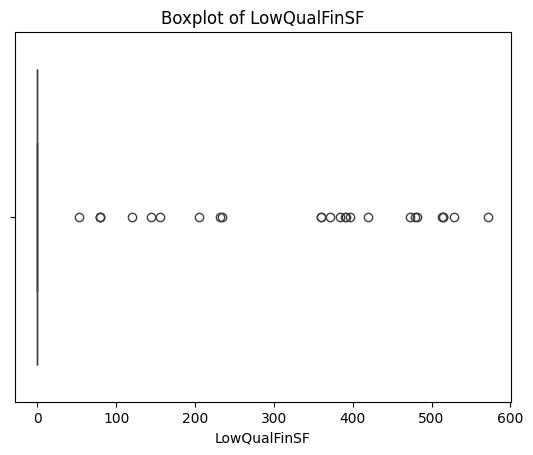

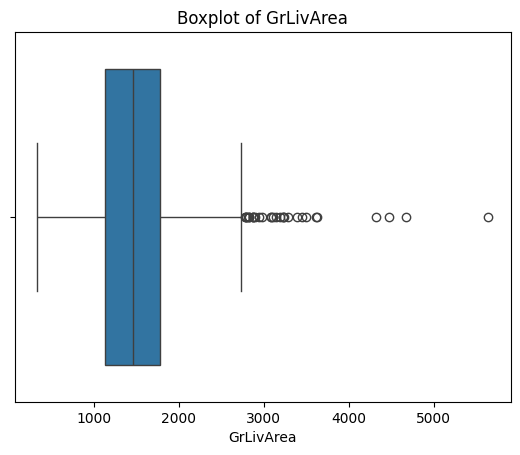

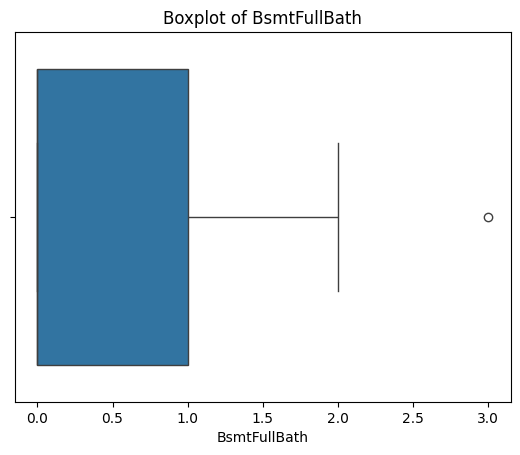

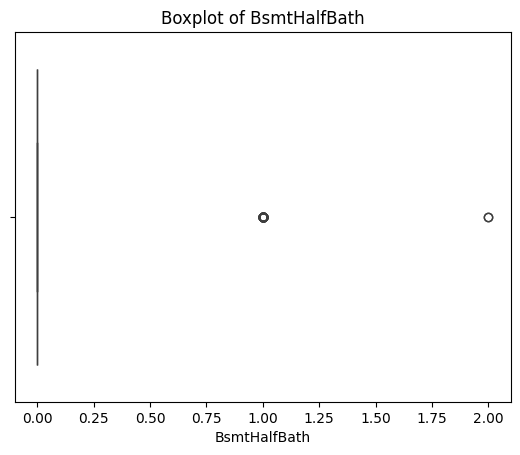

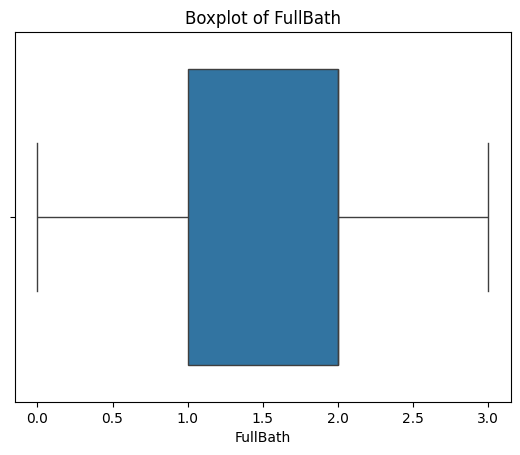

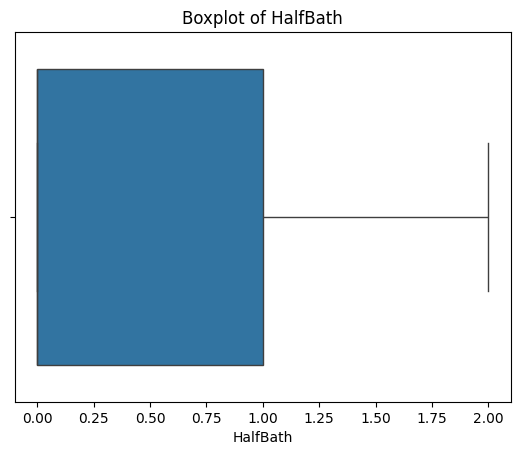

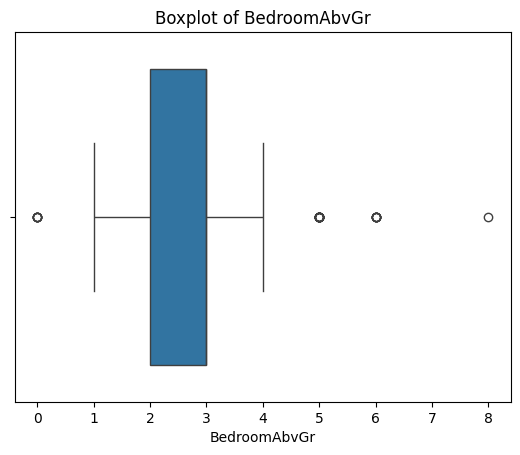

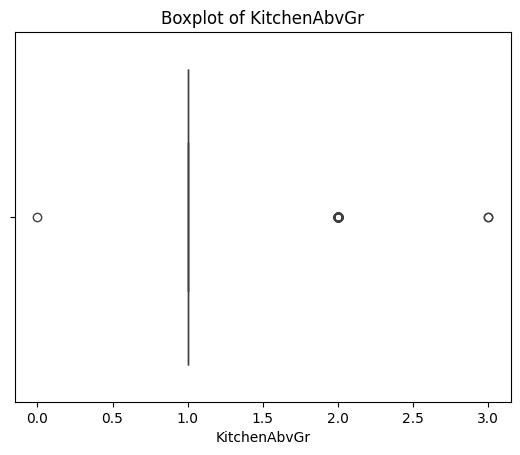

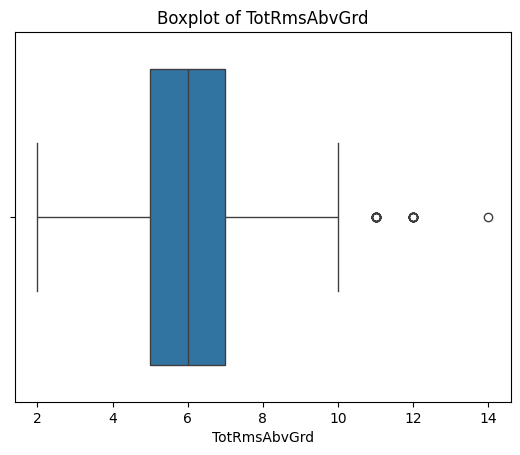

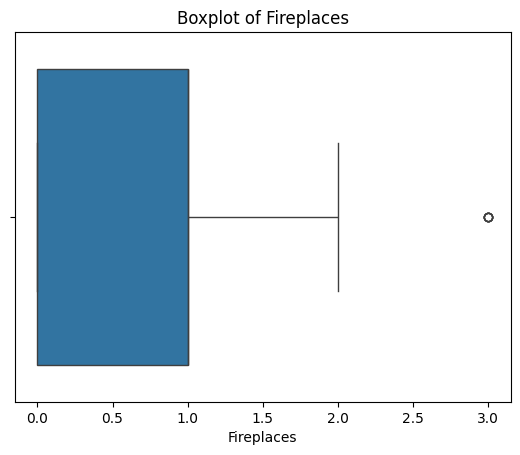

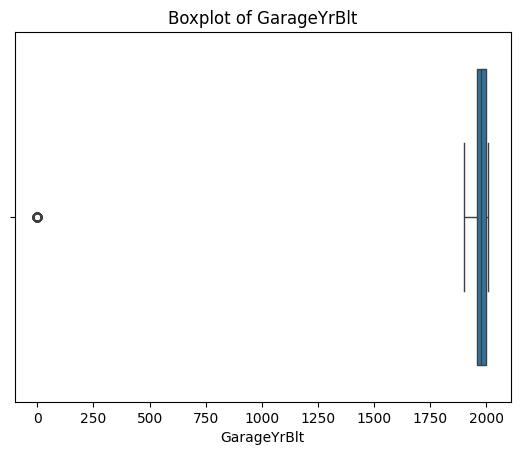

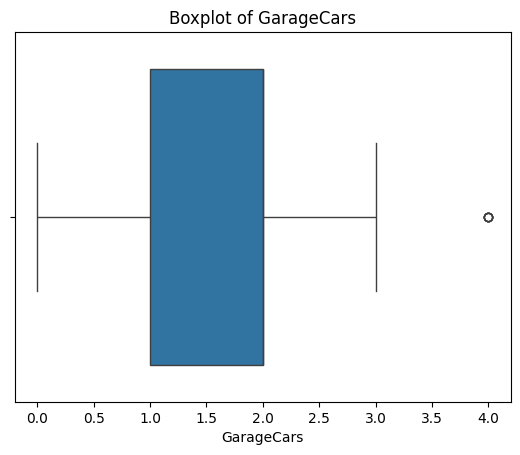

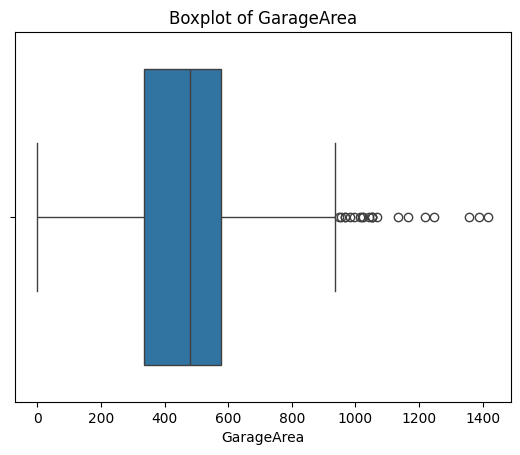

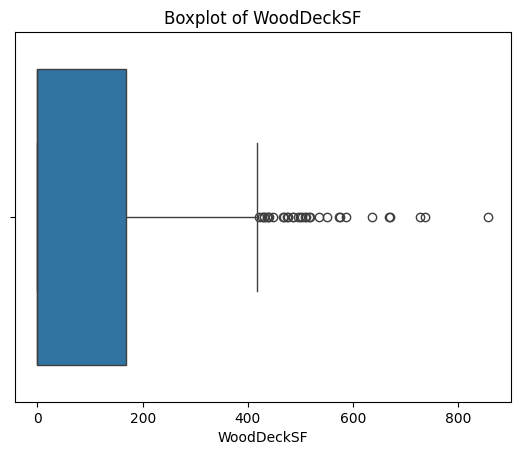

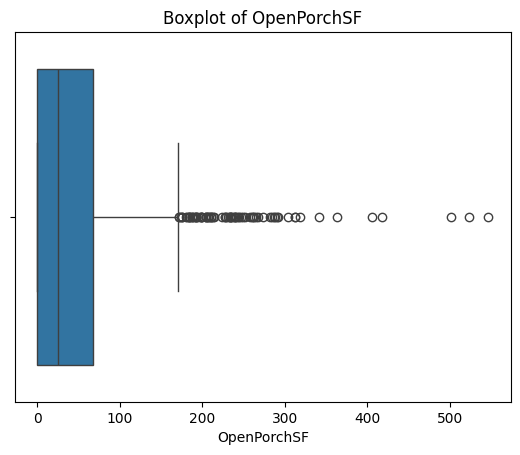

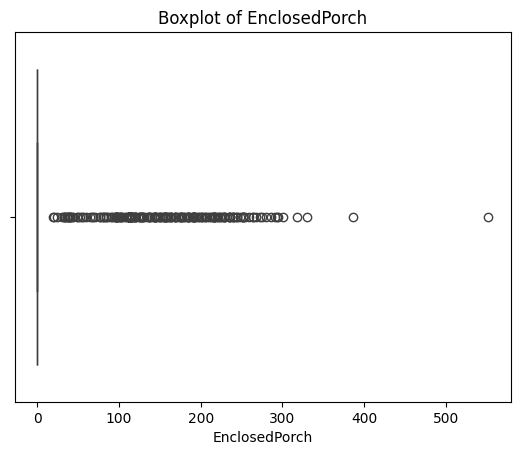

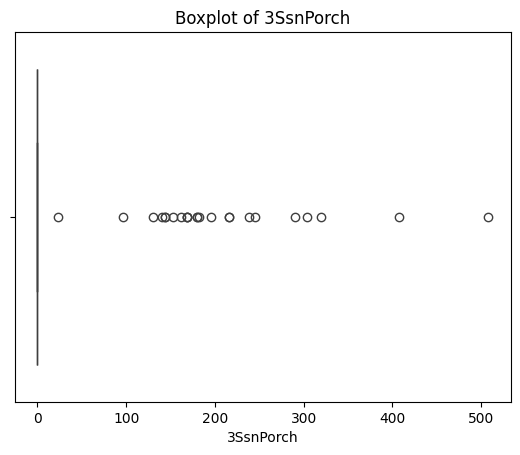

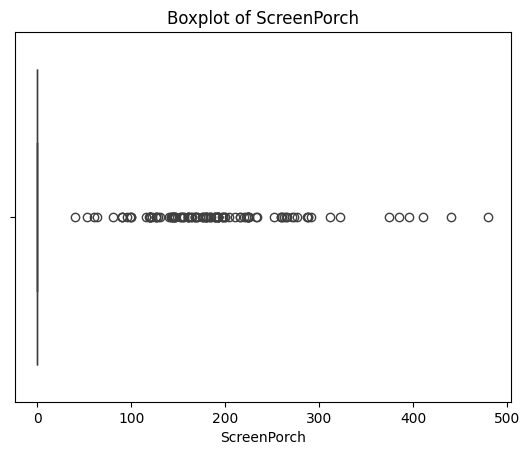

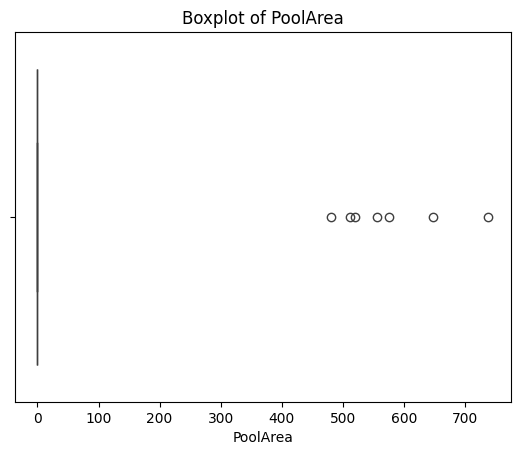

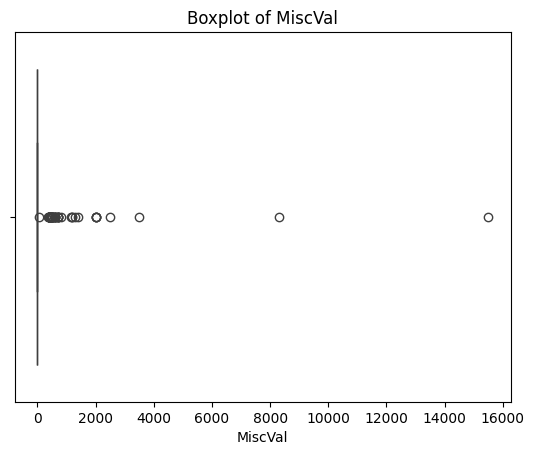

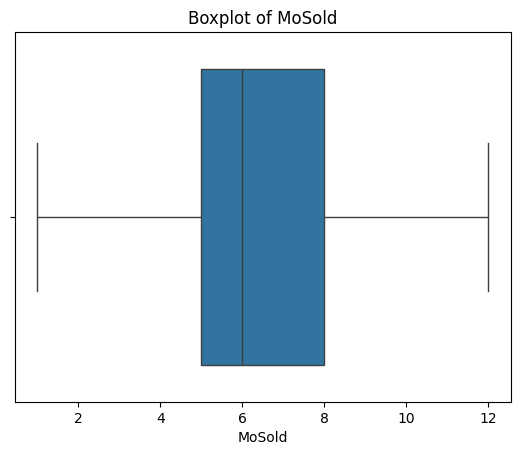

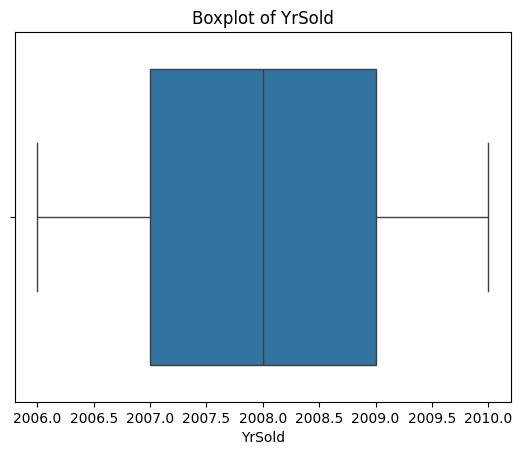

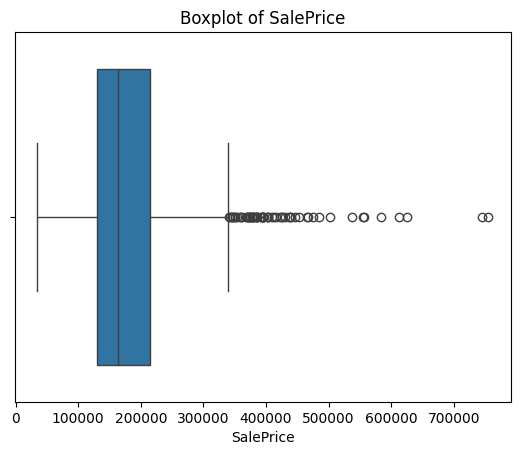

In [9]:
# Look for outliers:
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [10]:
max_value = df['SalePrice'].max()
min_value = df['SalePrice'].min()

print(f"Max value: {max_value}")
print(f"Min value: {min_value}")

Max value: 755000
Min value: 34900


In [11]:

# Function to handle outliers
def handle_outliers_iqr(df, column):
    """
    Handle outliers in a DataFrame column using the IQR method.
    - Caps outliers at the lower and upper bounds.
    """
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Cap outliers at the lower and upper bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df



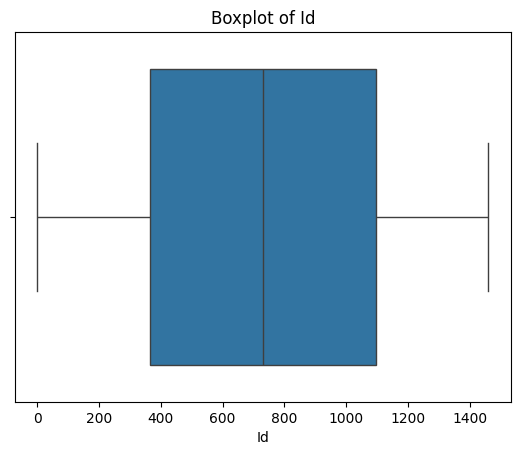

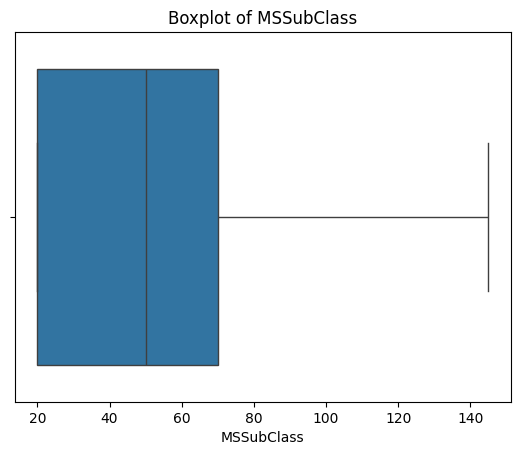

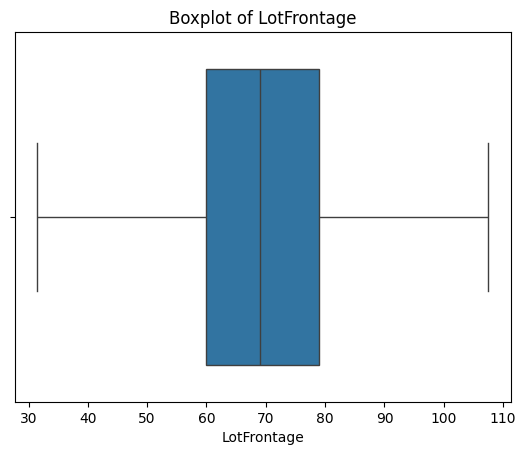

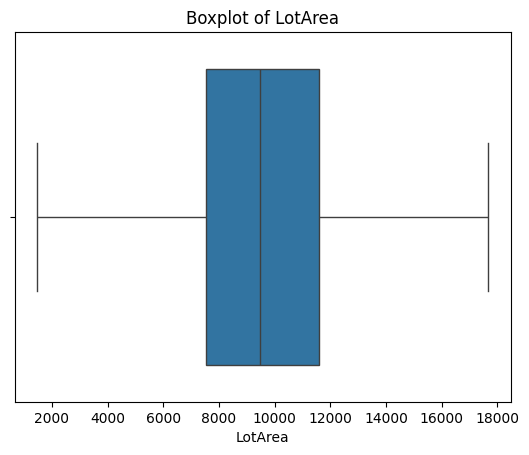

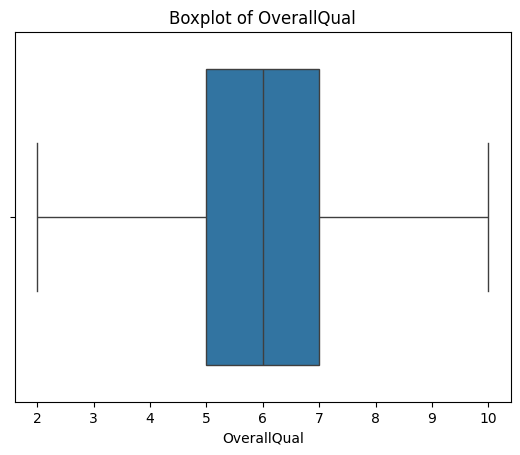

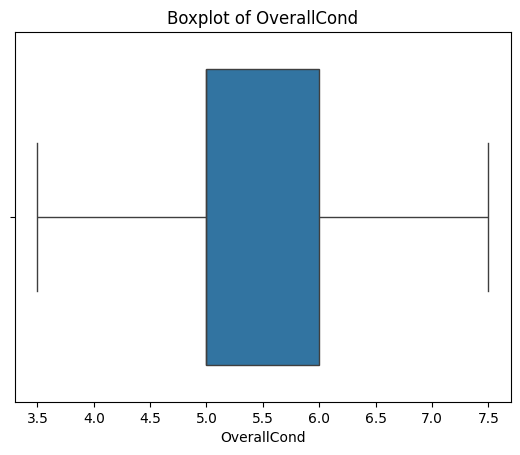

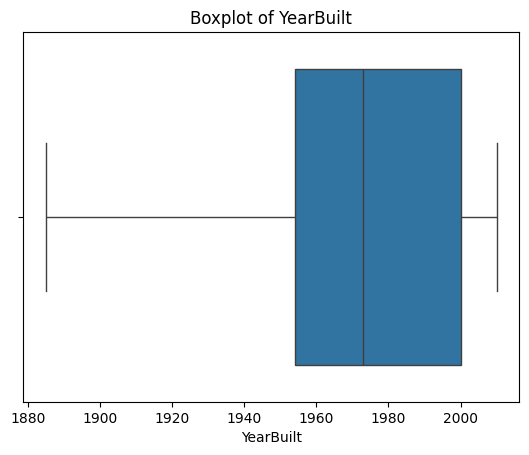

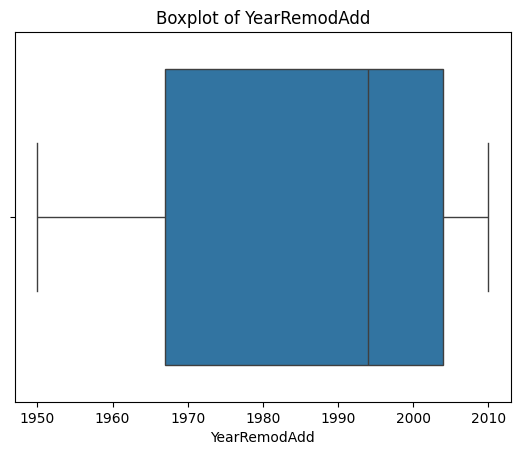

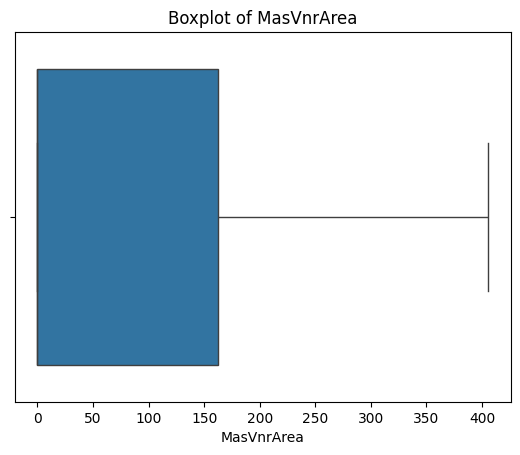

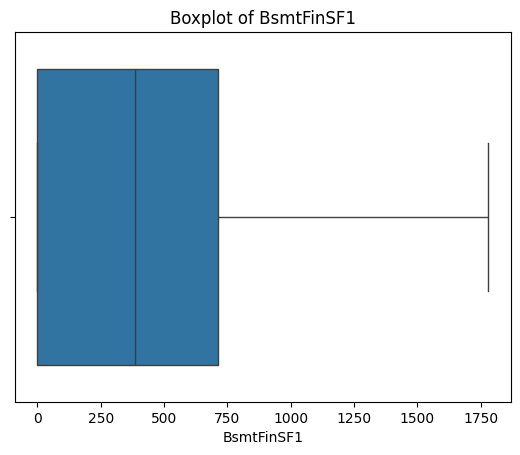

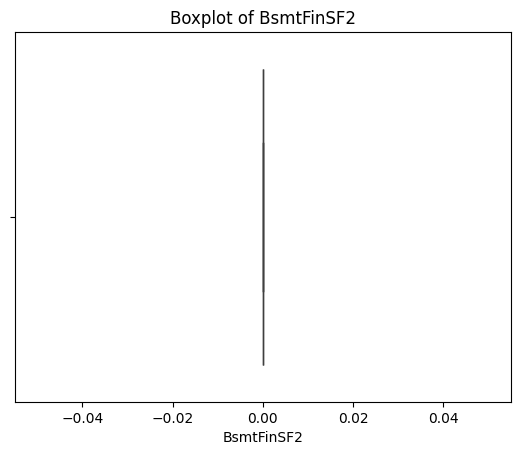

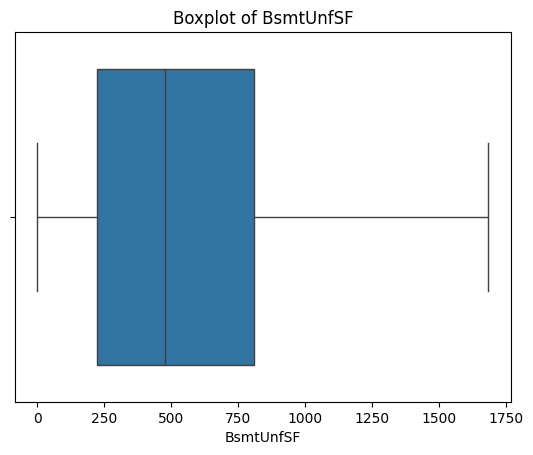

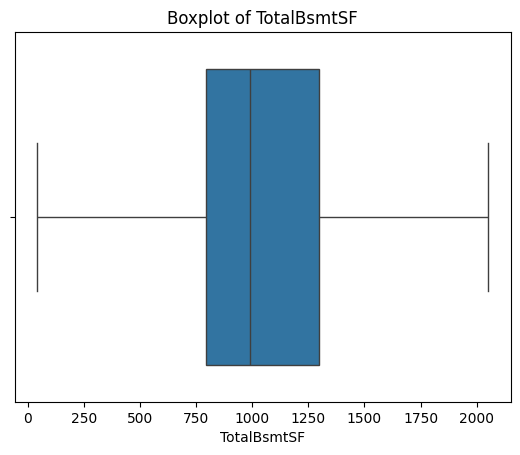

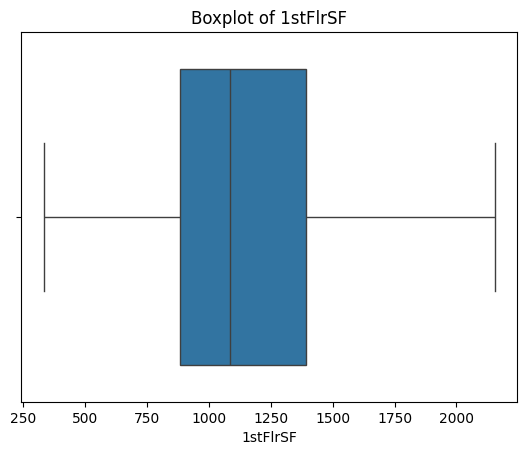

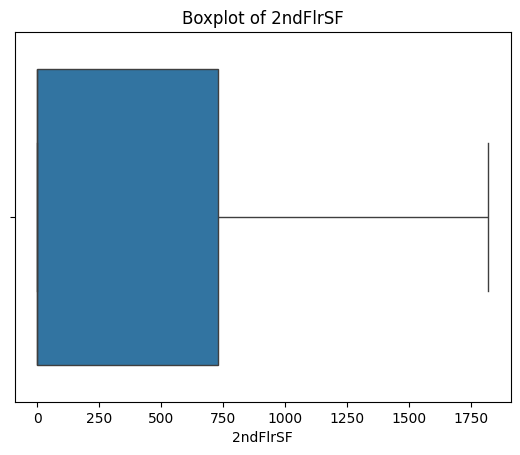

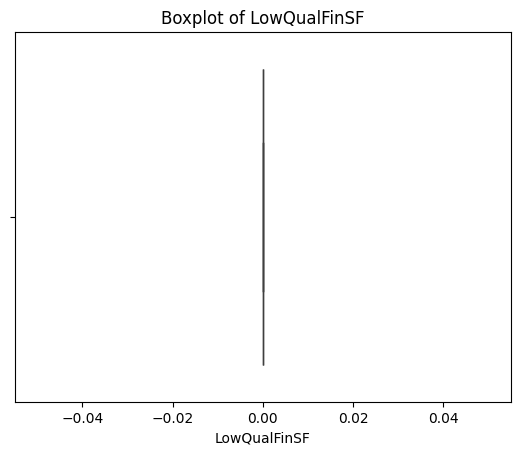

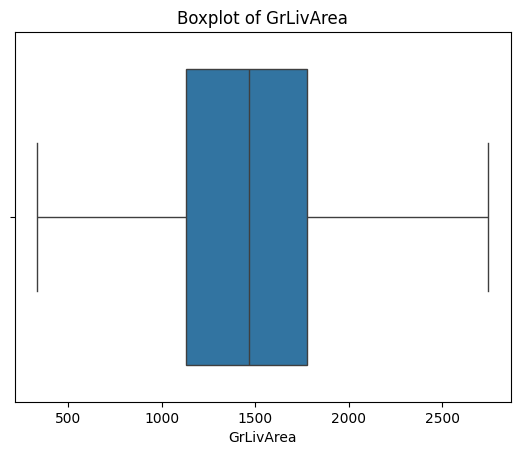

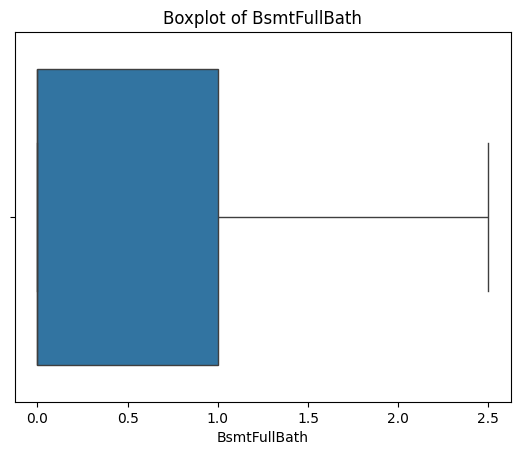

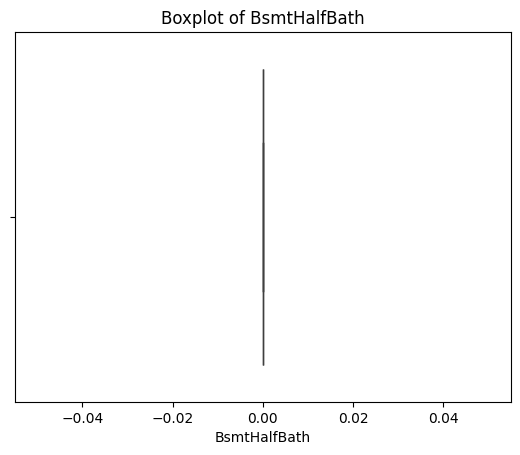

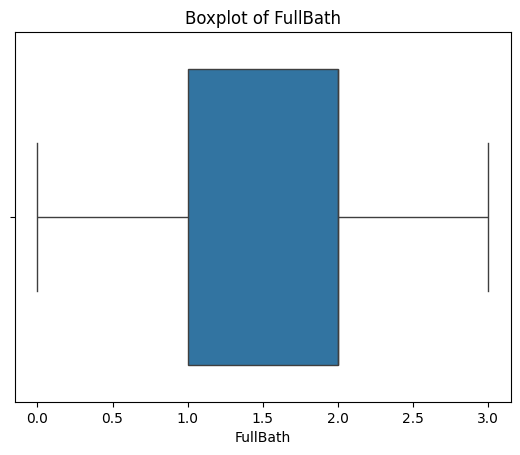

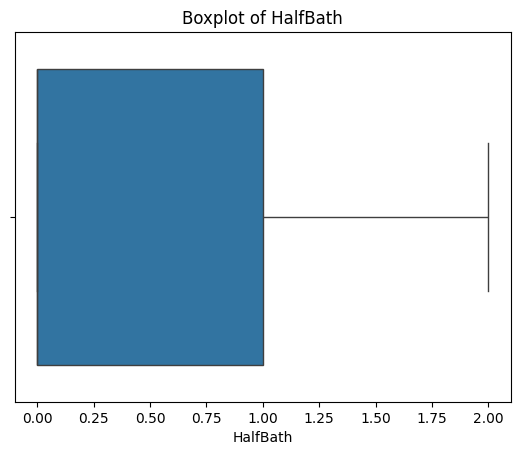

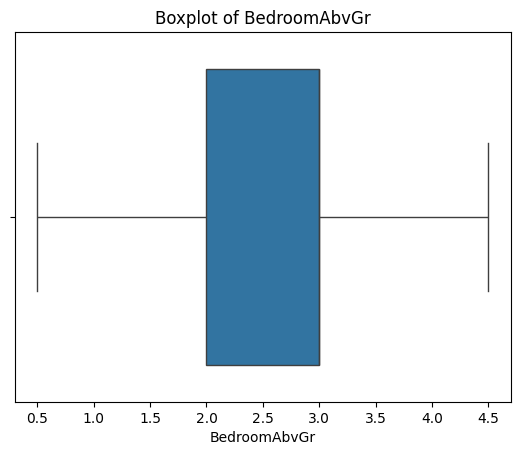

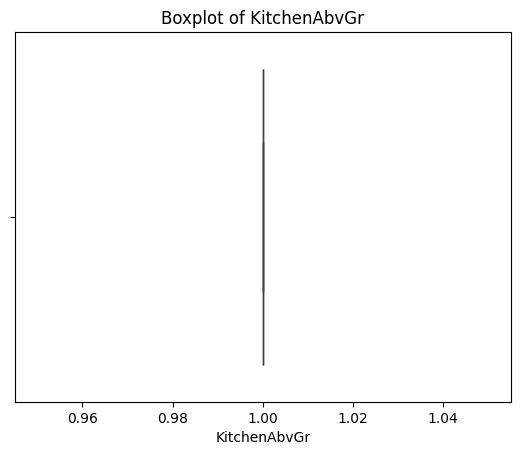

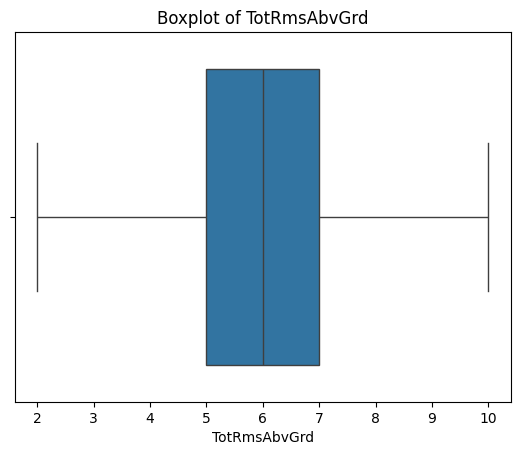

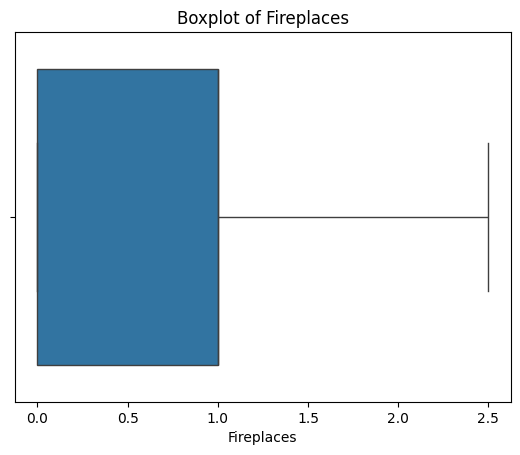

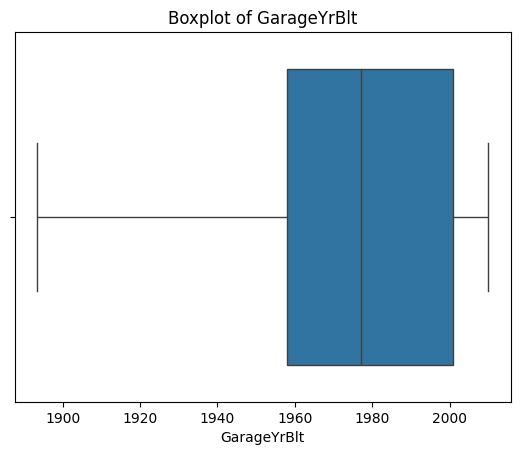

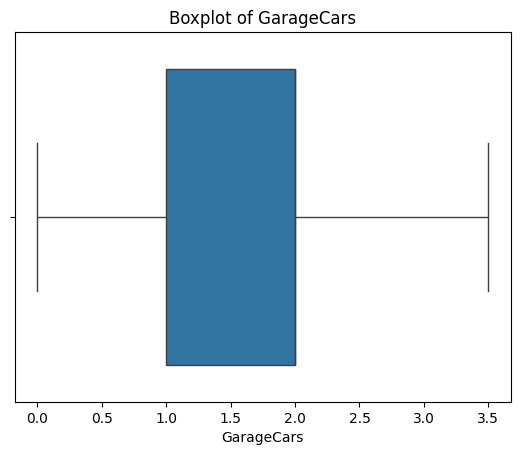

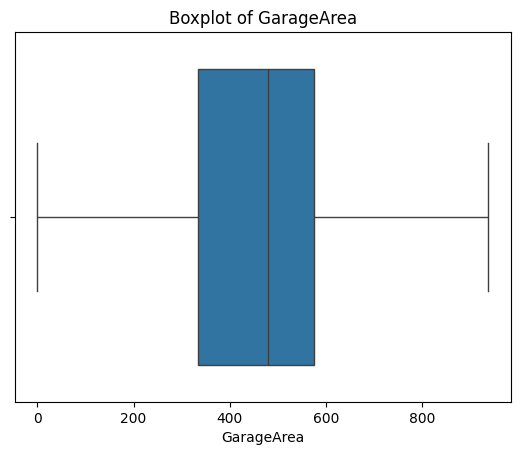

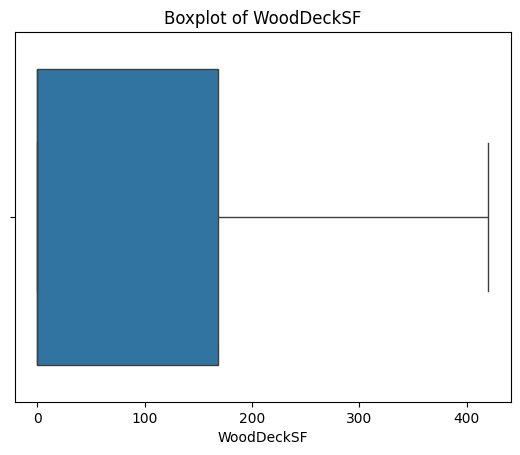

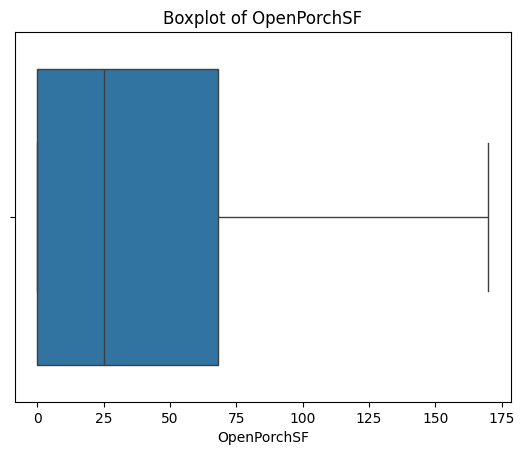

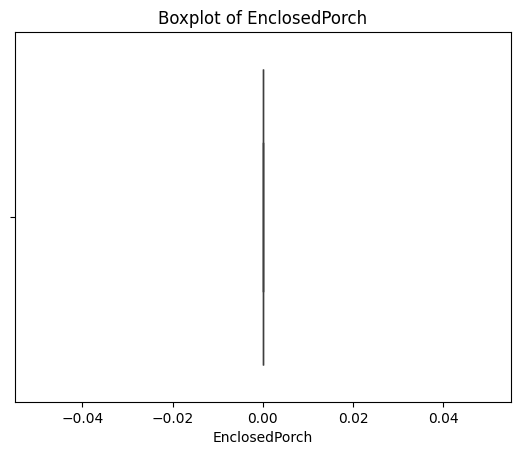

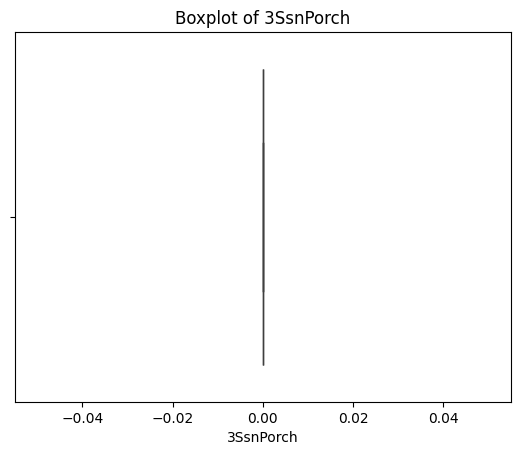

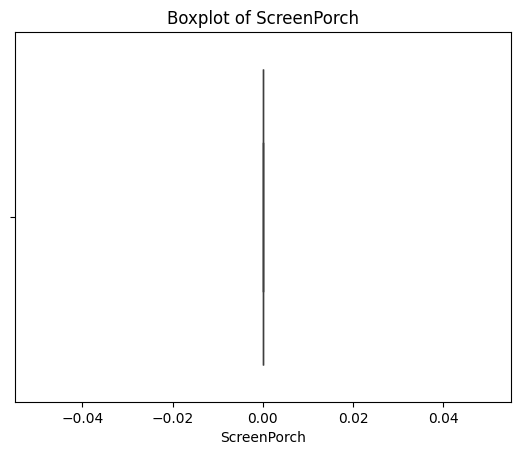

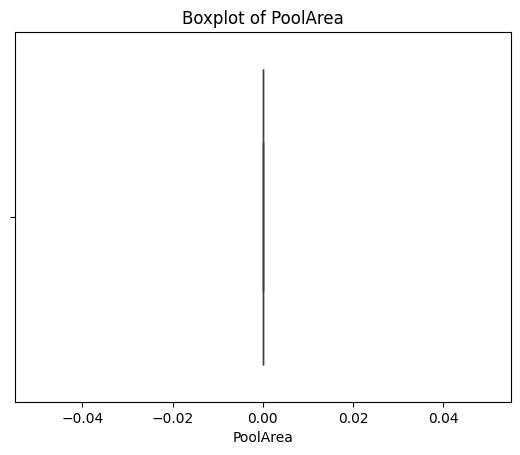

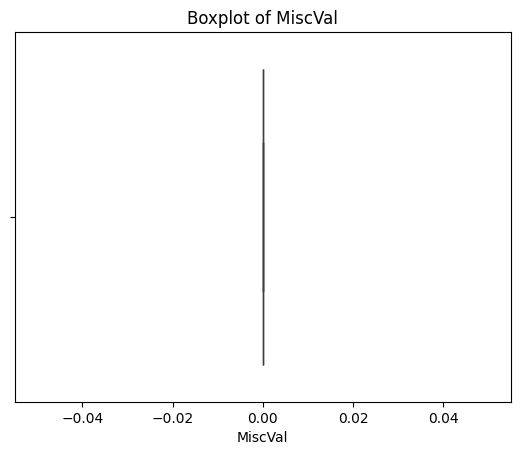

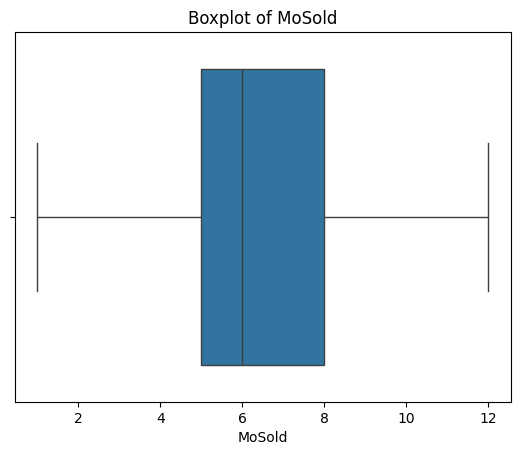

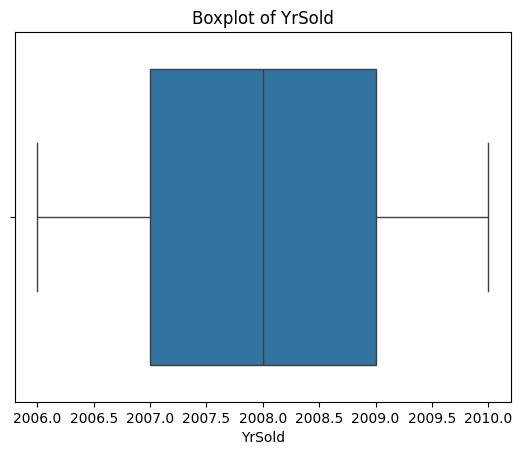

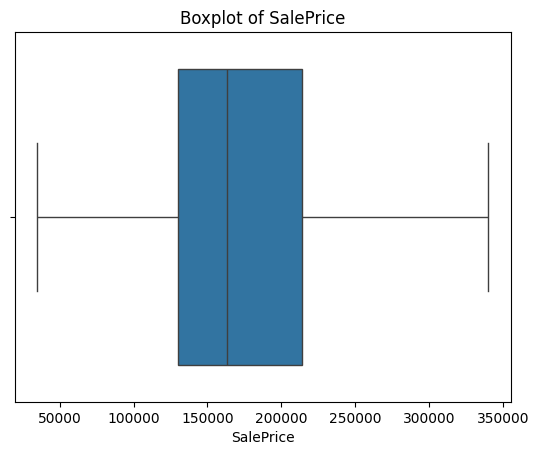

In [12]:
# List of numerical features (excluding the target variable 'SalePrice')
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# numerical_features.remove('SalePrice')

# Apply the function to handle outliers
new_df = handle_outliers_iqr(df, numerical_features)


for col in new_df.select_dtypes(include='number').columns:
  #not sure if target 'SalePrice' should be removed or not
    # if col != 'SalePrice':  # Skip the 'SalePrice' column
        sns.boxplot(x=new_df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()